IMPLEMENTATION OF RANDOM FORESTS ALGORITHM


In this project, I am using the HR employee attrition csv from kaggle. Employee turnover or attrition is a major cost for organisations and my objectives are to:

1. Analyze the dataset to find key patterns.

2. Build a random forest classifier to predict attrition

3. Identify the top drivers that cause employees to leave

   

In [13]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully")

Libraries imported successfully


We now want to load the data from our dataset and display the first few rows to understand the features or columns we are working with.

In [14]:
#data loading
df= pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (1)\HR-Employee-Attrition.csv")

pd.set_option('display.max_columns',None)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,Y,No,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Y,Yes,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2909.0,23159.0,1.0,Y,Yes,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0,Y,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


We now want to clean the target variable and ensure it contains only valid categories.

In [15]:
#keeping only the valid labels
df= df[df['Attrition'].isin(['Yes','No'])]

#Encoding the target safely
df['Attrition'] = df ['Attrition'].map({'No':0,'Yes':1})

df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

We now want to do Exploratory Data Analysis

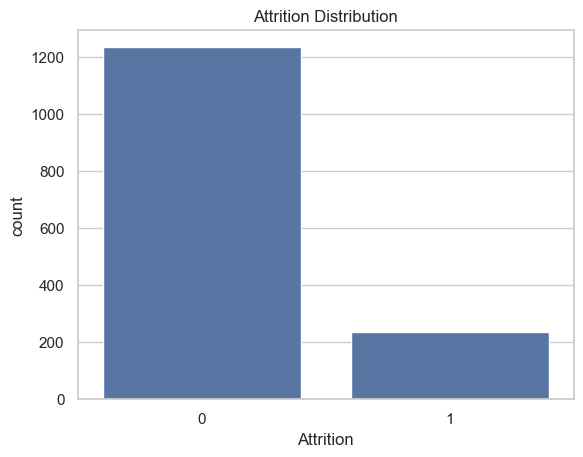

In [16]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

From the plot above, we can see that Attrition is a highly imbalanced variable w which impacts the model performance. We now want to drop the columns which are irrelevant. 

In [18]:
df.drop(
    ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'],
    axis=1,
    inplace=True,
    errors='ignore'
)



We now want to encode the categorical features. We will apply one-hot encoding to convert categorical features into numerical form

In [19]:
df_encoded = pd.get_dummies(df, drop_first = True)

We will now do the Train-Test Split, 80% Train and 20% Test sets using stratification to preserve class imbalance

In [20]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


We now want to handle misisng values before SMOTE because it does not support missing values, so imputation is performed prior to oversampling.

In [21]:
imputer = SimpleImputer(strategy = 'median')

X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)


We now want to apply SMOTE on Training Data only to prevent data leakage.

In [27]:
Smote = SMOTE(random_state=42)

X_train_sm,y_train_sm = Smote.fit_resample(X_train_imp, y_train)

pd.Series(y_train_sm).value_counts()

Attrition
0    986
1    986
Name: count, dtype: int64

We now want to train the Random Forest Model on the balanced dataset

In [30]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)


RandomForestClassifier(n_estimators=300, random_state=42)

We now want to do model evaluation using Precision, Recall, and confusion matrix

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.69      0.19      0.30        47

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294



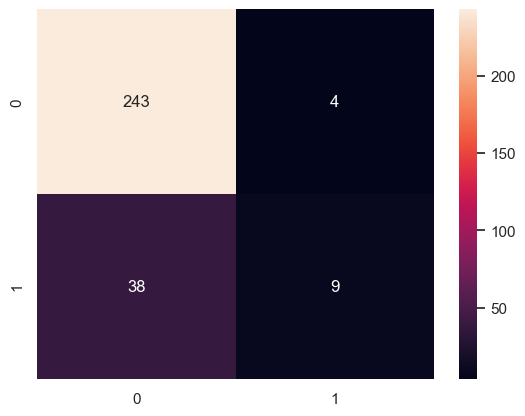

In [31]:
y_pred = rf.predict(X_test_imp)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


In [32]:
y_probs = rf.predict_proba(X_test_imp)[:, 1]

threshold = 0.3
y_pred_adj = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_adj))



              precision    recall  f1-score   support

           0       0.91      0.86      0.89       247
           1       0.44      0.57      0.50        47

    accuracy                           0.81       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.84      0.81      0.82       294



We now need to perform feature importance and visualization.

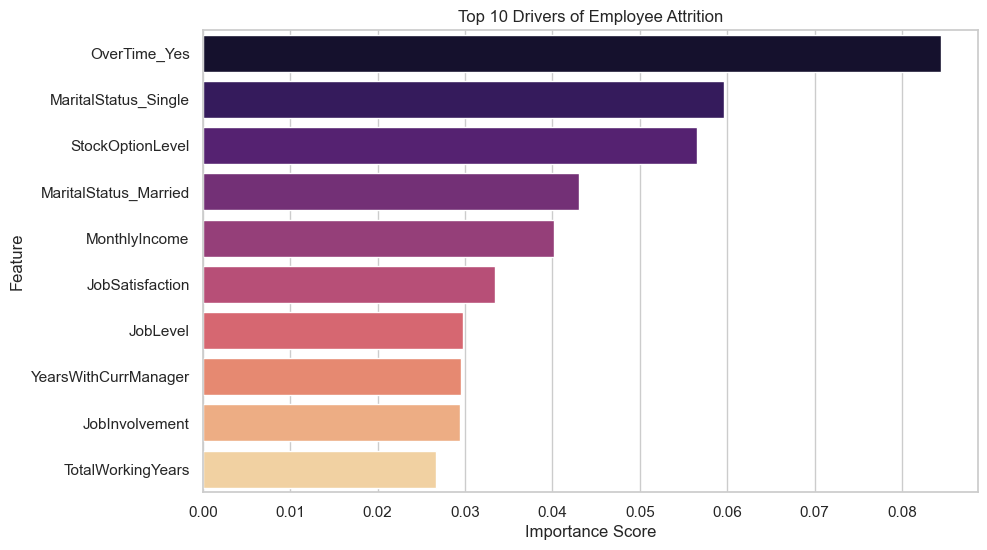

Top Insight: The graph above shows the #1 reason employees leave.


In [35]:
# Feature Importance
# We extract which columns the model found most useful
importances = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': df_encoded.drop('Attrition', axis=1).columns, 
                           'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Top 10 Features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='magma')
plt.title('Top 10 Drivers of Employee Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print("Top Insight: The graph above shows the #1 reason employees leave.")

We now need a Precision Recall Curve to justify our 0.3 Threshold.

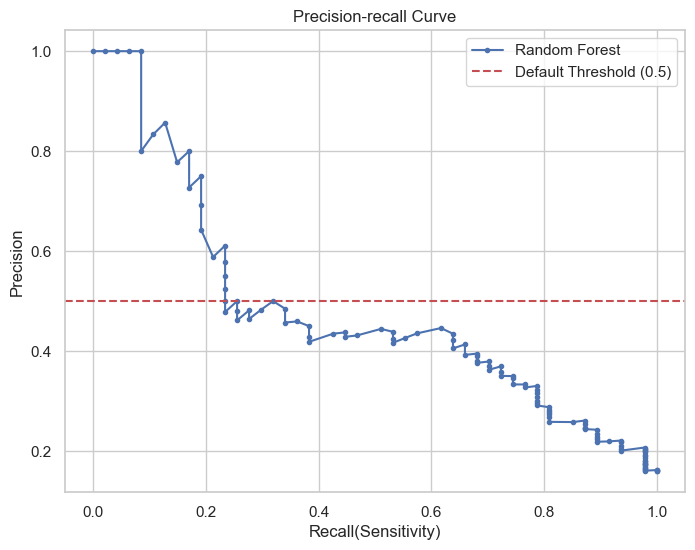

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title('Precision-recall Curve')
plt.xlabel('Recall(Sensitivity)')
plt.ylabel('Precision')
plt.axhline(y=0.5, color='r',linestyle='--', label= 'Default Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()

We now want to plot the confusion matrix to visualize the adjusted threshold of 0.3

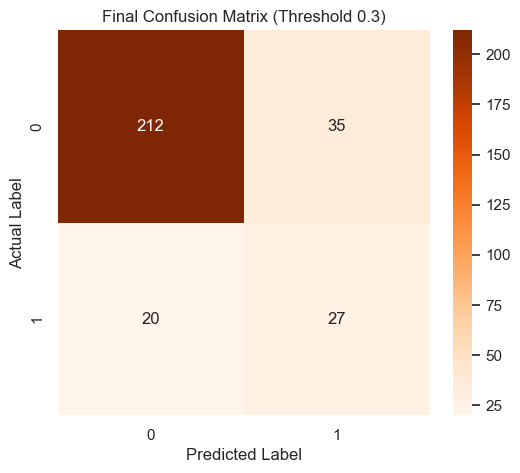

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_adj), annot=True, fmt='d', cmap='Oranges')
plt.title('Final Confusion Matrix (Threshold 0.3)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 6. Conclusion and Business Insights

### Project Summary
In this project, we developed a Random Forest Classifier to predict employee attrition. The dataset presented a significant challenge due to class imbalance (the majority of employees stay), which initially caused the model to be biased toward predicting "No Attrition."

To overcome this, we implemented **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the training data and optimized the **Decision Threshold** to `0.3`. These steps allowed the model to become more sensitive to detecting employees at risk of leaving.

### Model Performance
* **Overall Accuracy:** **81%**
* **Recall (Sensitivity):** **57%**. By adjusting the decision threshold, we successfully identified over half of the employees who were actually leaving.
* **Trade-off:** While this aggressive approach creates some false alarms (predicting someone will leave when they stay), it is highly valuable for HR. Identifying an "at-risk" employee early allows for intervention, which is far less costly than replacing an employee who leaves unexpectedly.

### Key Drivers of Attrition
According to our Random Forest model (In the above *Feature Importance* chart), the strongest predictors of turnover are:

1.  **OverTime (Top Driver):** The single biggest predictor of attrition is whether an employee works overtime. This strongly suggests that **burnout** is the primary reason people leave the organization.
2.  **Marital Status (Single):** Single employees showed a much higher likelihood of leaving compared to their married counterparts. This may indicate that younger or unattached employees feel less "anchored" to the company or are more aggressive in seeking external career growth.
3.  **Financial Incentives (Stock Options & Monthly Income):** `StockOptionLevel` and `MonthlyIncome` ranked 3rd and 5th respectively. This confirms that while workload (Overtime) is the trigger, **compensation packages** are a critical retention factor.

### Strategic Recommendations
Based on these data-driven insights, the management team should consider the following actions:

* **Address Burnout:** Immediately review the workloads of employees who frequently work overtime. Consider hiring additional staff or redistributing tasks to reduce the reliance on overtime.
* **Review Compensation Structures:** Since Stock Options and Income are top drivers, ensure that high-performing employees—especially those in the "at-risk" groups—are being compensated competitively.
* **Targeted Retention Plans:** Use this model to generate a monthly "Risk Report." HR should conduct "Stay Interviews" with employees flagged by the model (especially those working overtime) to address their concerns before they resign.